In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("F:\Downloads\insurance.csv")

In [ ]:
df.describe()

,AGE,BMI,CHILDREN,CHARGES
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       1338 non-null   int64  
 1   SEX       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   CHILDREN  1338 non-null   int64  
 4   SMOKER    1338 non-null   object 
 5   REGION    1338 non-null   object 
 6   CHARGES   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.columns

Index(['AGE', 'SEX', 'BMI', 'CHILDREN', 'SMOKER', 'REGION', 'CHARGES'], dtype='object')

In [ ]:
df.head()

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
le = LabelEncoder()
le.fit(df.SEX.drop_duplicates())
df.SEX = le.transform(df.SEX)

le.fit(df.SMOKER.drop_duplicates())
df.SMOKER = le.transform(df.SMOKER)

le.fit(df.REGION.drop_duplicates())
df.REGION = le.transform(df.REGION)

In [ ]:
corr = df.corr()
df.head()

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


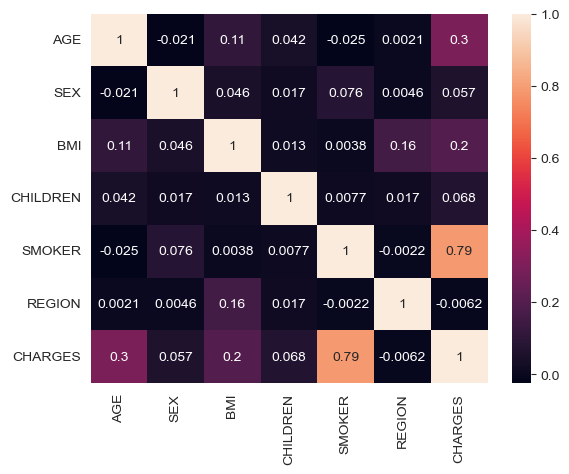

In [ ]:
sns.heatmap(corr, annot=True, cbar=True)
plt.show()

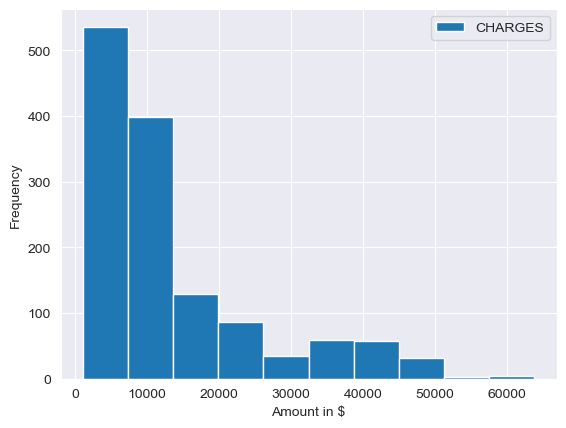

In [ ]:
df.CHARGES.plot(kind='hist')
plt.xlabel('Amount in $')
plt.legend()
plt.show()

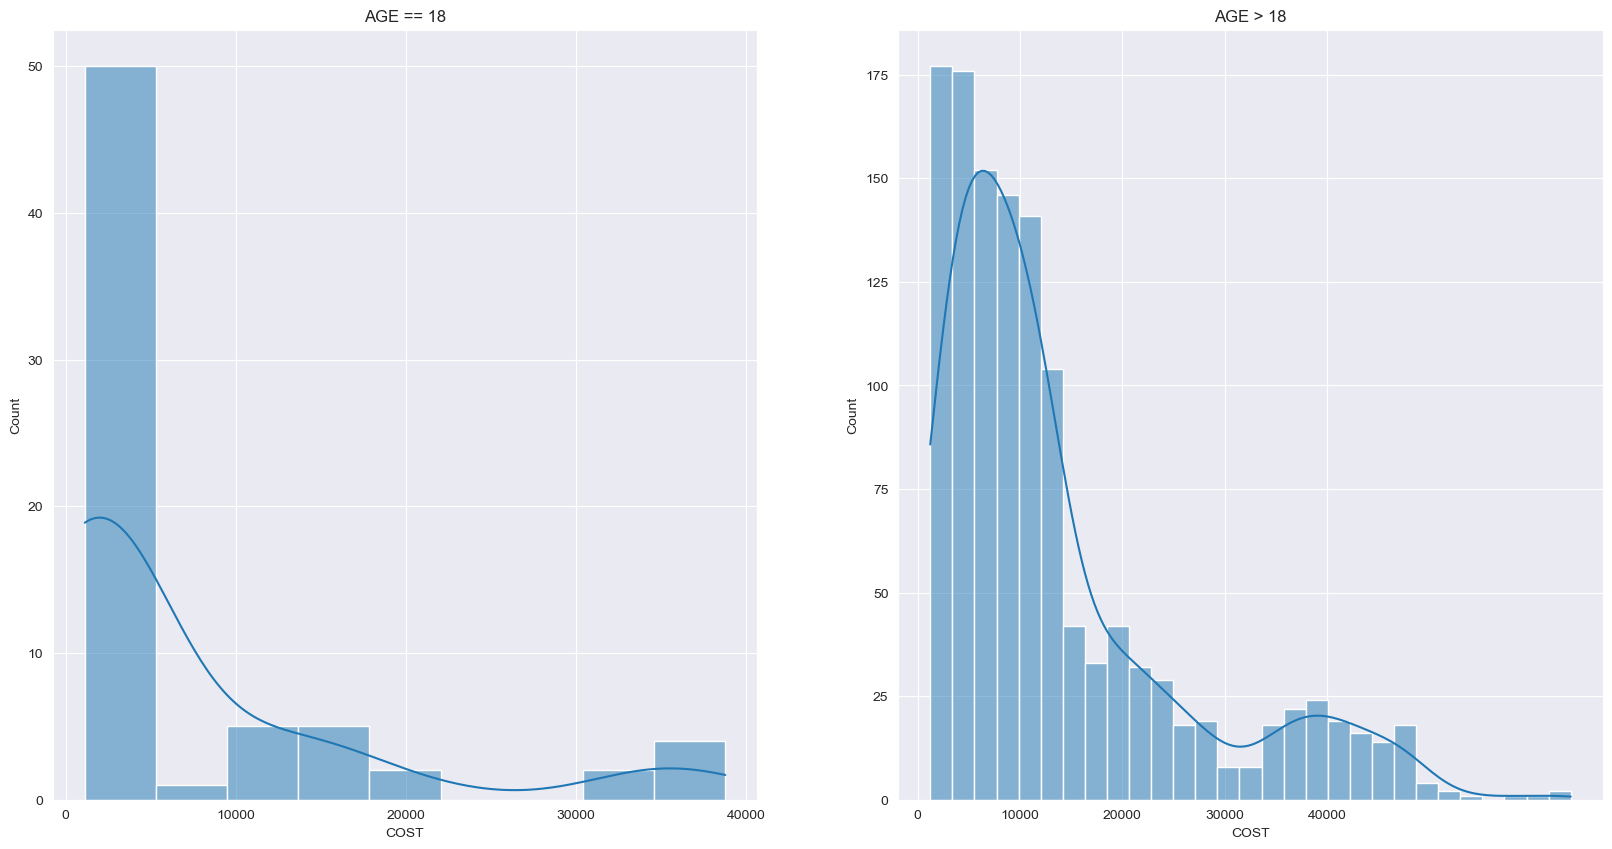

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121)
sns.histplot(df['CHARGES'][df['AGE'] == 18], ax=ax, kde=True)
plt.title('AGE == 18')
ax.set_xticks([0, 10000, 20000, 30000, 40000])
ax.set_xticklabels(np.arange(0, 50000, 10000))
plt.xlabel('COST')

ax = fig.add_subplot(122)
sns.histplot(df['CHARGES'][df['AGE'] > 18], ax=ax, kde=True)
plt.title('AGE > 18')
ax.set_xticks([0, 10000, 20000, 30000, 40000])
ax.set_xticklabels(np.arange(0, 50000, 10000))
plt.xlabel('COST')

plt.show()

In [ ]:
df.SMOKER.value_counts()

0    1064
1     274
Name: SMOKER, dtype: int64

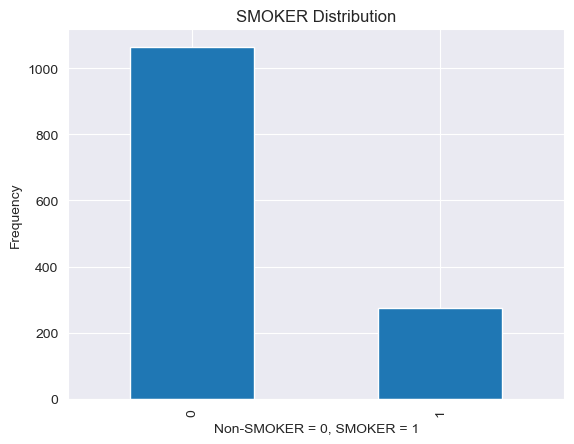

In [ ]:
plt.xlabel('Non-SMOKER = 0, SMOKER = 1')
plt.ylabel('Frequency')
plt.title('SMOKER Distribution')
df.SMOKER.value_counts().plot(kind='bar')
plt.show()

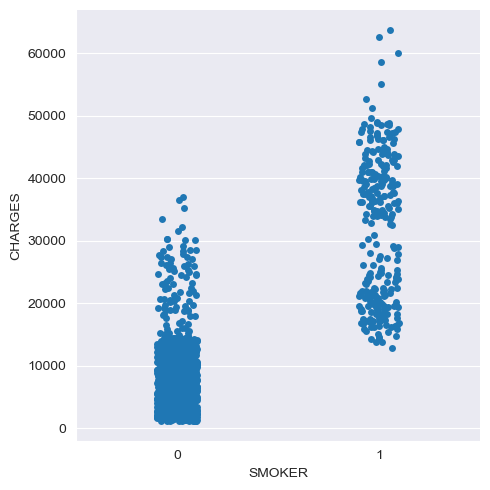

In [ ]:
sns.catplot(x='SMOKER', y='CHARGES', data=df)
plt.show()

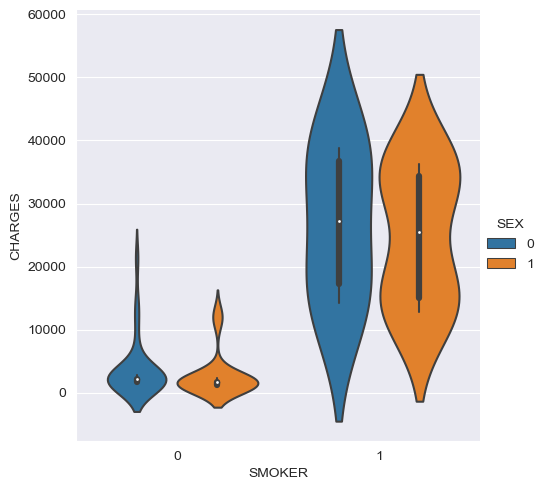

In [ ]:
sns.catplot(x='SMOKER', y='CHARGES', hue='SEX', kind='violin', data=df[df['AGE'] == 18], legend=True)
plt.show()

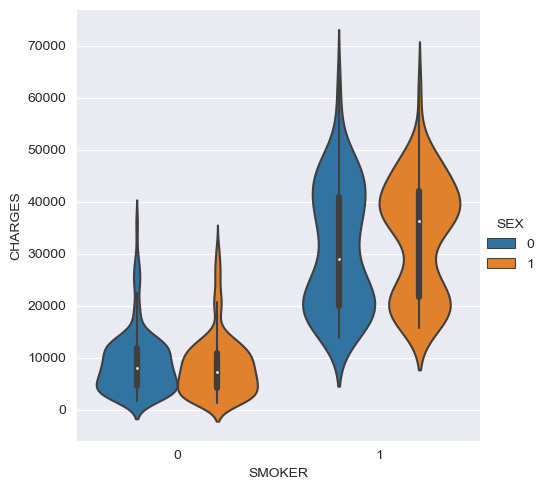

In [ ]:
sns.catplot(x='SMOKER', y='CHARGES', hue='SEX', kind='violin', data=df[df['AGE'] > 18], legend=True)
plt.show()

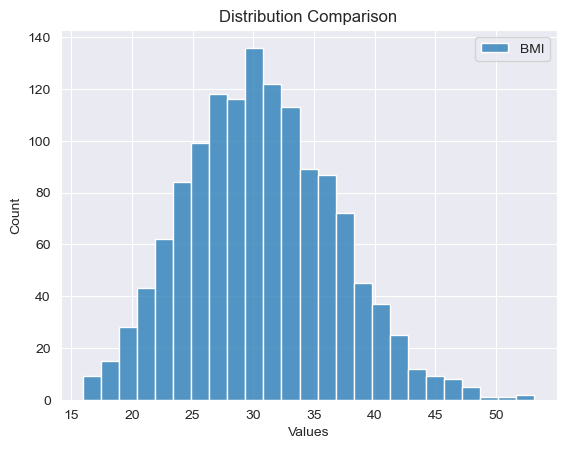

In [110]:
sns.histplot(df['BMI'], label='BMI')
plt.title('Distribution Comparison')
plt.xlabel('Values')
plt.legend()
plt.show()

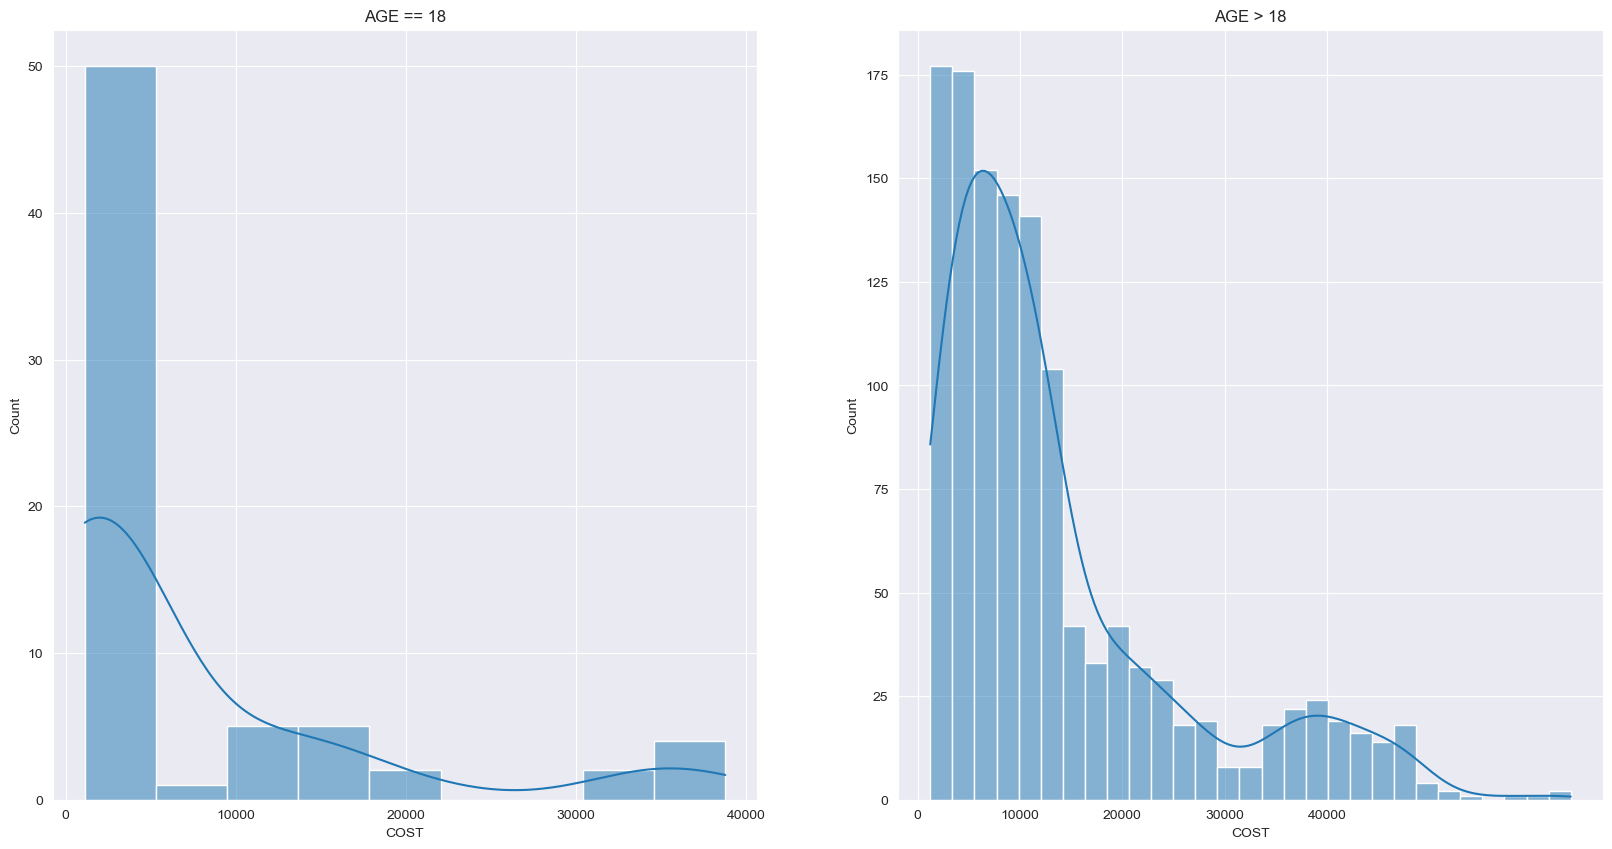

In [111]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121)
sns.histplot(df['CHARGES'][df['AGE'] == 18], ax=ax, kde=True)
plt.title('AGE == 18')
ax.set_xticks([0, 10000, 20000, 30000, 40000])
ax.set_xticklabels(np.arange(0, 50000, 10000))
plt.xlabel('COST')

ax = fig.add_subplot(122)
sns.histplot(df['CHARGES'][df['AGE'] > 18], ax=ax, kde=True)
plt.title('AGE > 18')
ax.set_xticks([0, 10000, 20000, 30000, 40000])
ax.set_xticklabels(np.arange(0, 50000, 10000))
plt.xlabel('COST')

plt.show()

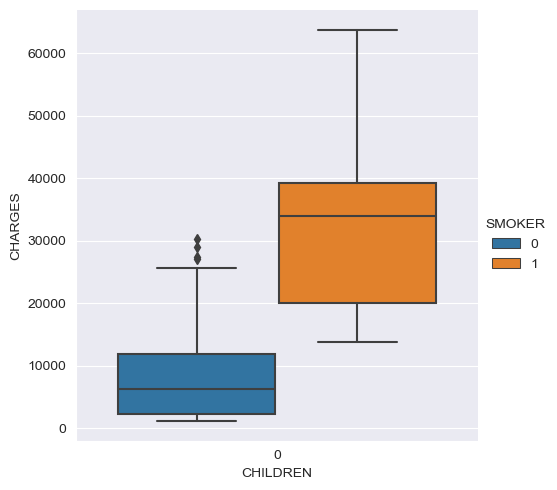

In [112]:
sns.catplot(x='CHILDREN', y='CHARGES', hue='SMOKER', kind='box', data=df[df['CHILDREN'] == 0])
plt.show()

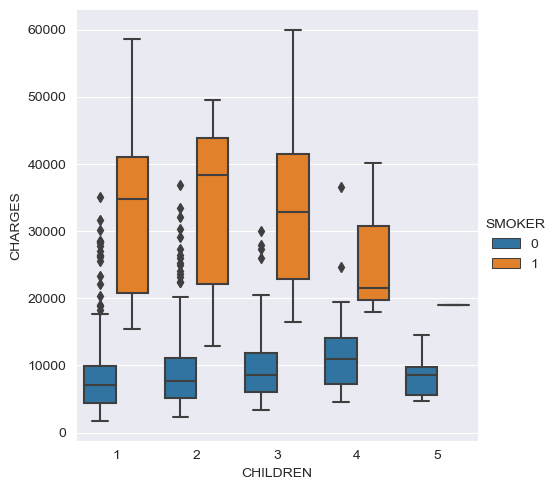

In [113]:
sns.catplot(x='CHILDREN', y='CHARGES', hue='SMOKER', kind='box', data=df[df['CHILDREN'] > 0])
plt.show()

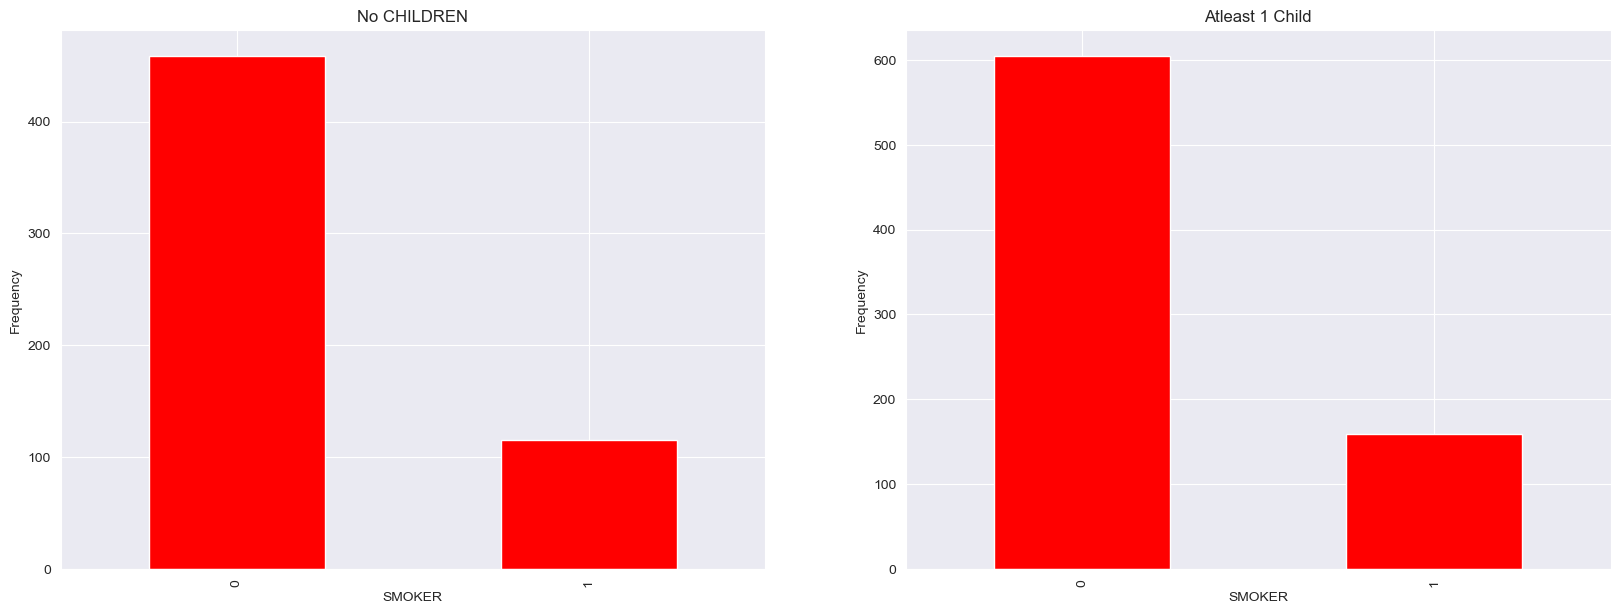

In [114]:
fig = plt.figure(figsize=(20,7))

ax=fig.add_subplot(121)
ax = df[df['CHILDREN'] == 0].SMOKER.value_counts().plot(kind='bar', color='red')
plt.title('No CHILDREN')
plt.xlabel('SMOKER')
plt.ylabel('Frequency')

ax=fig.add_subplot(122)
df[df['CHILDREN'] > 0].SMOKER.value_counts().plot(kind='bar', color='red')
plt.title('Atleast 1 Child')
plt.xlabel('SMOKER')
plt.ylabel('Frequency')

plt.show()

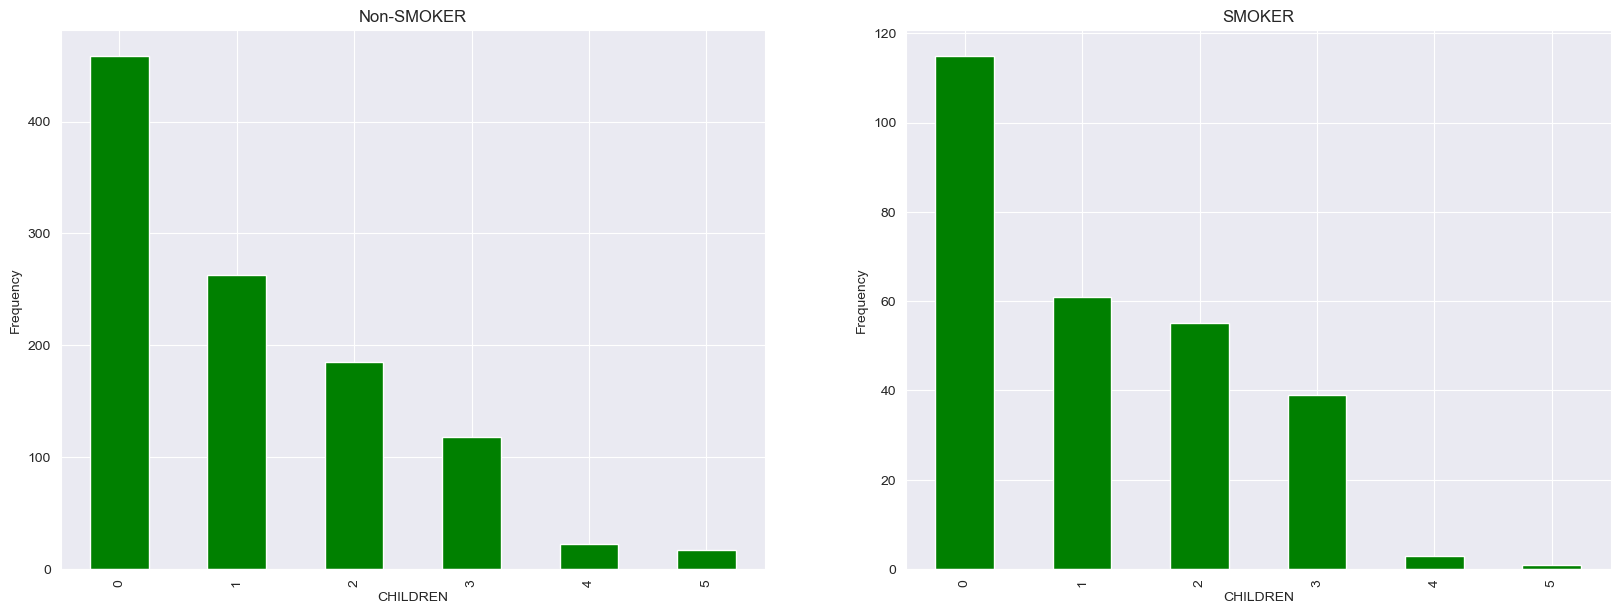

In [115]:
fig = plt.figure(figsize=(20,7))

ax=fig.add_subplot(121)
ax = df[df['SMOKER'] == 0].CHILDREN.value_counts().plot(kind='bar', color='green')
plt.title('Non-SMOKER')
plt.xlabel('CHILDREN')
plt.ylabel('Frequency')

ax=fig.add_subplot(122)
ax = df[df['SMOKER'] == 1].CHILDREN.value_counts().plot(kind='bar', color='green')
plt.title('SMOKER')
plt.xlabel('CHILDREN')
plt.ylabel('Frequency')

plt.show()

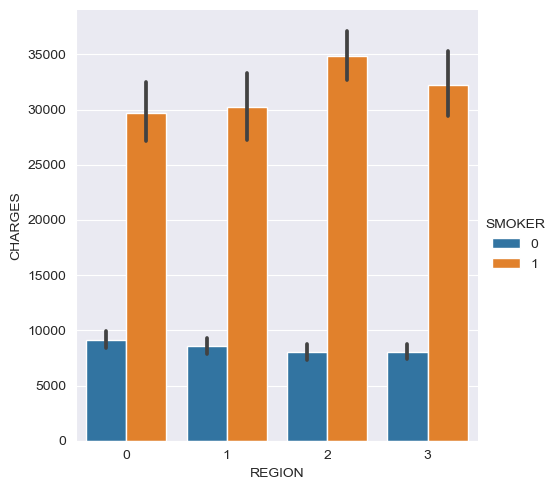

In [116]:
sns.catplot(x='REGION', y='CHARGES', hue='SMOKER', kind='bar', data=df)
plt.show()